# Week3 Two-way ANOVA
## 背景描述
实验研究了操作温度和三种面板玻璃材料对示波器管输出光的影响。
这是一个压力（因子𝐴）水平数 $𝑎=3$，温度（因子𝐵）水平数 $𝑏=3$ 和重复次数 $𝑛=3$ 的双因子实验。



## 数据描述
| 变量名 | 变量含义 | 变量类型 | 变量取值范围 |
| :----------: | :--------: | :----------: | :----------: |
| （自变量）Glass_Type | 玻璃材料类型 | categorical variable | [1，2，3] |
| （自变量）Temperature |   温度   | continuous variable | [100, 125, 150] |
| （因变量）Light_Output | 输出光 | continuous variable | Real |



## 问题 
注：这里使用 \alpha=0.05 的显著性水平

1. 试判断玻璃类型和温度对输出光是否有显著影响.
2. 用适合的残差图来检验设定模型的恰当性.
3. 选出一种玻璃类型 使得不论温度高低都能使示波器管的输出光较高.
4. 估计参数$\mu$、$\tau_i$、$\beta_j$和$(\tau\beta)_{ij}\quad(i=1,...,a;j=1,...,b)$
5. 如何对这种示波器管的输出光进行预测？


## 问题1:试判断玻璃类型和温度对输出光是否有显著影响.
检验行处理效应的等式假设:  $𝐻_{01}:\tau_1=\tau_2=\cdots=\tau_a=0$  vs  $𝐻_{11}:\tau_i \neq 0, \exists i$  
检验列处理效应的等式假设:  $𝐻_{02}:\beta_1=\beta_2=\cdots=\beta_b=0$  vs  $𝐻_{12}:\beta_j \neq 0, \exists j$  
检验行与列处理没有交互作用假设:  $𝐻_{03}:(\tau\beta)_{ij}=0, \forall i,j$  vs  $𝐻_{13}:(\tau\beta)_{ij} \neq 0, \exists i,j$ 

In [1]:
# Import standard packages
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import math

# Import additional packages
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.multicomp import (pairwise_tukeyhsd, MultiComparison)

alpha = 0.05
a = 3
b = 3
n = 3

x = pd.read_csv('Project3.csv')
data = x.values
df = pd.DataFrame(data, columns = ['Glass','Temperature','Light'])
print(df.head())

# Do the two-way ANOVA

model = ols('Light~ C(Glass) + C(Temperature) + C(Glass):C(Temperature)',df).fit()
anova_results = round(anova_lm(model), 20)
print('\n双因素方差分析表：\n', anova_results)

   Glass  Temperature  Light
0      1          100    580
1      1          100    568
2      1          100    570
3      2          100    550
4      2          100    530

双因素方差分析表：
                            df        sum_sq        mean_sq            F  \
C(Glass)                  2.0  1.508645e+05   75432.259259   206.370554   
C(Temperature)            2.0  1.970335e+06  985167.259259  2695.259499   
C(Glass):C(Temperature)   4.0  2.905517e+05   72637.925926   198.725707   
Residual                 18.0  6.579333e+03     365.518519          NaN   

                               PR(>F)  
C(Glass)                 3.886026e-13  
C(Temperature)           0.000000e+00  
C(Glass):C(Temperature)  1.254188e-14  
Residual                          NaN  


由上面的方差分析表可知，在$\alpha=0.05$的水平下：  
对玻璃材料来说，$p=3.886026e-13  <0.05$，所以玻璃材料对Light有显著影响；  
对温度来说，$p=0.000000e+00  <0.05$，所以温度对Light也具有显著影响；  
对玻璃材料和温度的交互因素来说，$p=1.254188e-14<0.05$，所以俩交互因素对Light也具有显著影响.

In [ ]:
【多重比较】
在双因子析因设计实验中，如果交互作用是显著的，一个因子（例如，因子 𝐴）的均值间的比较可能由于交互作用而模糊不清。

解决这类问题的方法是：将另一个因子（因子 𝐵）固定在一特定水平上，在此水平上对因子 𝐴 的均值使用 Tukey 检验法。  (多重比较)
由上面方差分析表可知，行均值、列均值和交互项均有显著性差异，
所以下面我们进一步固定温度水平为 70℉，（举个例子）
对 3 种材料进行多重比较，以Tukey的Honestly Significant Difference(HSD)检验法为例: 

固定温度水平为 125℉: 三种材料之间的多重比较: 
  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1 group2 meandiff p-adj    lower    upper  reject
------------------------------------------------------
     1      2 -52.3333 0.0523 -105.2908  0.6241  False
     1      3 -32.6667  0.221  -85.6241 20.2908  False
     2      3  19.6667 0.5285  -33.2908 72.6241  False
------------------------------------------------------


/usr/local/lib/python3.8/site-packages/statsmodels/sandbox/stats/multicomp.py:775: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(np.insert(self.groupsunique.astype(str), 0, ''))


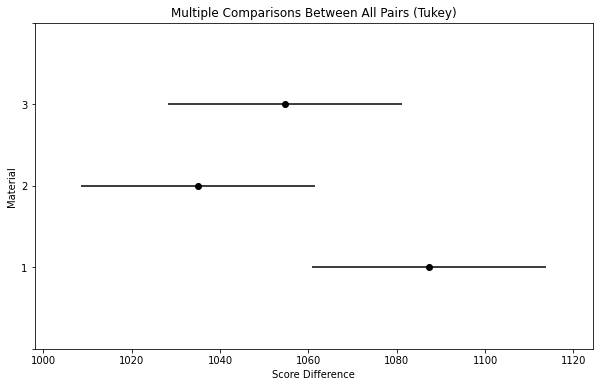

In [4]:
multiComp = MultiComparison(df.loc[df['Temperature'] == 125, 'Light'], df.loc[df['Temperature'] == 125, 'Glass'])
tukey = multiComp.tukeyhsd()
print('固定温度水平为 125℉: 三种材料之间的多重比较: \n', tukey)

tukey.plot_simultaneous(ylabel= 'Material', xlabel= 'Score Difference')
print('\n')

结果说明：  
这一分析表明，当温度水平为 125℉ 时，材料类型 2 与类型 3 的电池平均寿命是相同的，而材料类型 1 的电池平均寿命显著地低于材料类型 2 与类型 3。